# 第九次作业

## 一、问题提出
### Use the symmetry of the capacitor problem to write a program that obtains the result by calculating the potential in only one quadrant Of the x-y plane.   两块有限导体平板横坐标为±0.3，纵坐标范围是-0.3~+0.3。边界条件为左侧平板上电势为+1，右侧平板上电势为-1，周围x=±1和y=±1的地方电势为0.

## 二、问题背景及分析
### 不存在电荷的空间中，电势的分布遵循拉普拉斯方程$$\frac{∂^2V}{∂x^2}+\frac{∂^2V}{∂y^2}+\frac{∂^2V}{∂z^2}=0$$
### 加上边界条件，理论上我们就可以解出电势V。但是除了一些特殊的边界条件以外，对于这类问题我们难以得到解析解。所以我们必须使用数值计算的方法，得到电势的数值解。
### 教材中使用的方法是relaxation method（松弛迭代法），可求解线性微分方程，Jacobi方法（雅可比迭代法）是其中较简单的一种。解决方案二： Jacobi（1、确定边界条件；2、利用jacobi方法:
$$V_{new}(i,j)=\frac {1} {4}[V_{old}(i+1,j)+V_{old}(i-1,j)+V_{old}(i,j+1)+V_{old}(i,j-1)]$$
### 解决方案一：Jacobi方法的改进版是Gauss-Seidel方法。在计算中，我们总是算完一个点再算另一个点，也就是逐点更新计算结果。该方法主要的改进是在计算某一点的电势时，使用之前的点已经更新后的数据。

## 三、具体实现
### 方案一（最终版） ：Gauss-Seidel方法，对电容器附近的电势进行求解，求得的电势分布如图所示：

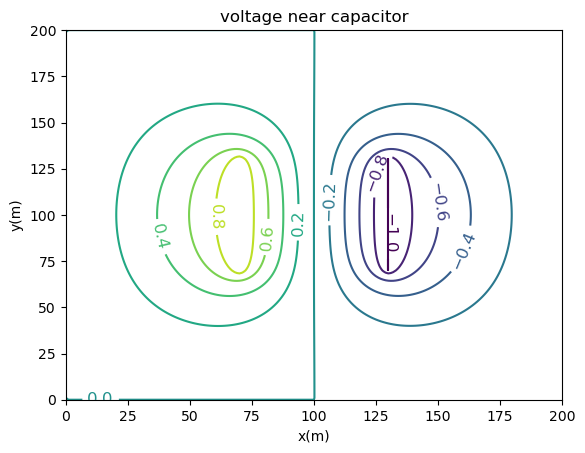

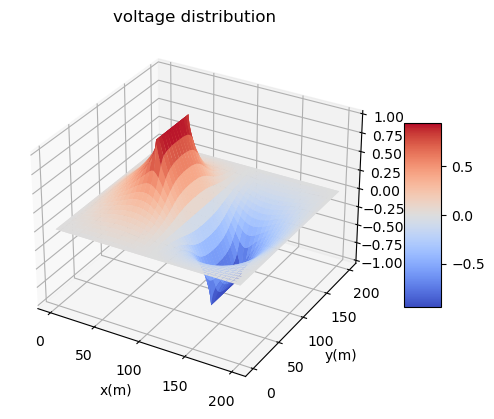

In [4]:
from __future__ import division
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# initialize the grid

grid = []
for i in range(201):    
    row_i = []
    for j in range(201):
        if i == 0 or i == 200 or j == 0 or j == 200:
            voltage = 0
        elif 70<=i<=130 and j == 70:
            voltage = 1
        elif 70<=i<=130 and j == 130:
            voltage = -1
        else:
            voltage = 0
        row_i.append(voltage)
    grid.append(row_i)

# define the update_V function (Gauss-Seidel method)

def update_V(grid):

    delta_V = 0

    for i in range(201):    
        for j in range(201):
            if i == 0 or i == 200 or j == 0 or j == 200:
                pass
            elif 70<=i<=130 and j == 70:
                pass
            elif 70<=i<=130 and j == 130:
                pass
            else:
                voltage_new = (grid[i+1][j]+grid[i-1][j]+grid[i][j+1]+grid[i][j-1])/4
                voltage_old = grid[i][j]
                delta_V += abs(voltage_new - voltage_old)
                grid[i][j] = voltage_new

    return grid, delta_V

# define the Laplace_calculate function

def Laplace_calculate(grid):

    epsilon = 10**(-5)*200**2
    grid_init = grid
    delta_V = 0
    N_iter = 0

    while delta_V >= epsilon or N_iter <= 10:
        grid_impr, delta_V = update_V(grid_init)
        grid_new, delta_V = update_V(grid_impr)
        grid_init = grid_new
        N_iter += 1

    return grid_new

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

x = np.linspace(0,200,201)
y = np.linspace(0,200,201)
X, Y = np.meshgrid(x, y)
Z = np.array(Laplace_calculate(grid))

plt.figure()
CS = plt.contour(X,Y,Z,10)
plt.clabel(CS, inline=1, fontsize=12)
plt.title('voltage near capacitor')
plt.xlabel('x(m)')
plt.ylabel('y(m)')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z,cmap=cm.coolwarm)
ax.set_xlabel('x(m)')
ax.set_ylabel('y(m)')
ax.set_zlabel('voltage(V)')
ax.set_title('voltage distribution')
fig.colorbar(ax.plot_surface(X, Y, Z,cmap=cm.coolwarm), shrink=0.5, aspect=5)

plt.show()

### 由以上两图可知，空间中的电势场在左侧平板上呈现一个峰，在右侧平板上呈现一个谷。整体的分布情况与我们的直觉相符。

### 方案二：Jacobi迭代法，采用class的方法来编写

0.1736395140857035
0.9992452511491352
1.1331686450637484
1.6163556287128635
2.360604028142845
2.831136845691508
2.864804132560124
3.790599783489636
4.25987322837927
5.109999508205059
5.273595239464821
6.081933076222389
6.110254321487827
6.891868869816054
7.154444434105973
7.656835392159614
7.726580211391422
7.907692604392947
8.61314410294811
9.134046052284674
9.800673764569442
10.245182348650097
10.38134230761756
11.31156556371116
11.517016610440777
11.946331974482122
12.316020744699165
12.926118829073976
13.10368636161218
13.750525636307632
14.659473568132748
15.044483739597412
15.346044349007354
15.87027239360798
16.131333812842463
16.2306584256297
16.66631057193086
16.84603131362909
17.384850044236074
17.980777730614598
18.45320220328504
19.005951144128584
19.402920377913762
19.724144185838828
19.94792291295525
20.105368442250644
20.3098569229263
21.2564939415792
22.041841422487717
22.251161275838793
22.375995251060807
22.601177519821945
22.86457346053142
23.26841605389523
23.377833

22.279464448853318
22.65322817881719
23.051723827950124
23.56510914840231
24.482749656782754
25.29200322350843
25.427411582595465
25.683149410395618
25.899589906035562
26.07663843833059
26.599180541072126
26.615092555691152
26.68291068838984
26.800090484184366
27.420649618740192
27.83533518526524
115
0.4482848791949206
1.4075566535935127
1.554824717825745
1.8132038599091813
2.761871105756865
3.2562027834583627
3.5397904809595677
4.463490801111998
5.117231788124261
5.993193693530037
6.0408251984098404
6.900437377078056
7.132723375246654
7.948016514110232
8.299502891635782
8.879623845588585
8.909733215587227
9.277536784022283
10.182136254853116
10.83623760999209
11.356929499489496
11.888862487450526
11.989123103121932
12.993398179467036
13.027145107424245
13.670662142220607
14.231831203458563
14.941432424859327
14.98976073384563
15.56704596309789
16.33945676763667
16.897566316940434
17.078104280471123
17.730203012883948
18.08229243564654
18.391658827134354
18.991623204690082
19.409700910

0.44752400562143857
1.4052951587851794
1.5547728024501963
1.8160308296350265
2.7611972854302635
3.2514600063048107
3.539626426959201
4.468354063543796
5.116681056162934
5.986902876702059
6.040543280344591
6.90638095732341
7.132270636320181
7.941035105609019
8.299151640638978
8.885980713841608
8.92285921263459
9.283844129271957
10.18158272545591
10.828785379039656
11.342543384264129
11.88144360811786
11.988703104970812
13.000006686840132
13.040809192083694
13.67724669664675
14.231315856254321
14.933800650275048
14.974999860828984
15.545146906630073
16.32470193321009
16.875663491173725
17.049051007779063
17.708302377390886
18.067547389262838
18.38407394350602
18.991205194772245
19.416458586453114
19.905508913381976
20.49769041601958
20.752116450934622
21.465381665734782
21.81440091838863
22.286319758799173
22.66731840799922
23.072942690255978
23.59330439881848
24.517715636556627
25.32046357615893
25.449694991520616
25.71121555176471
25.932979409082854
26.105226457890204
26.63199044052891

18.383465447926778
18.991398051369973
19.417475436634845
19.907374215084083
20.49868155525288
20.754007925371805
21.466347212159395
21.81441681827767
22.287305628675924
22.669289487997894
23.0759073715732
23.597262493264637
24.522656802125667
25.32444347147101
25.45274781931132
25.715148325328055
25.93773202890359
26.109231905928574
26.63665865371937
26.656729760927664
26.721166034533365
26.835781457323154
27.45805983105441
27.871885548330138
298
0.44740129843946963
1.4049313718841296
1.5547620480058086
1.8164767718347559
2.761092744091382
3.2507223252914685
3.539592537506666
4.4690821511591095
5.116601483459612
5.985982077259044
6.040485936252775
6.907199079977528
7.132210111215041
7.940100023033541
8.299081381272236
8.88676149282459
8.924474665954484
9.284642565847689
10.18158203204978
10.828002836147155
11.340995045471848
11.880646673091336
11.98864512735523
13.000677337353165
13.042200351274023
13.677923212981087
14.23128132335235
14.933056378408953
14.973544861003912
15.5429778628

16.32288985426978
16.872934180972564
17.045388444747633
17.70559279737299
18.065814262049276
18.383344440200467
18.991510039187503
19.417831747299537
19.907987082728575
20.499024952239026
20.754634068347436
21.466677390154043
21.814438388105337
22.28764726306527
22.669960777191694
23.076915327694397
23.598610850667715
24.524345378427395
25.325796460896875
25.453774693307604
25.716486782677208
25.939362437170047
26.110594953139156
26.638259831663206
26.658535673668805
26.72280416275272
26.837291582824655
27.45965615343756
27.873438639253706
409
0.4473633858965338
1.4048190223208592
1.5547585681924416
1.8166138720965155
2.761060812685591
3.250496592810937
3.5395813978295463
4.469302261534467
5.116577833791254
5.985706174778638
6.04046702619409
6.907438529915403
7.132192732364144
7.939829711439181
8.299058301098048
8.88697868790302
8.924924436451361
9.284867754605077
10.181590550543648
10.827802214451374
11.340592205482185
11.88043990141779
11.988629158493818
13.0008478639615
13.042554070

/tmp/ipykernel_85/2822269438.py:52: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


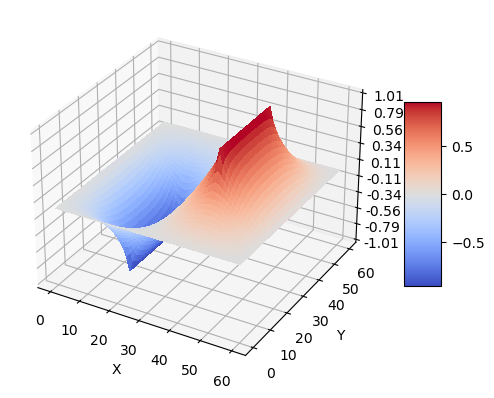

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import random
A_a=list(range(61))
A_a.remove(15)
A_a.remove(45)
class Fields:
    def __init__(self):
        self.v=[]
        self.old_v=[]
        for i in range(61):
            self.v.append([])
            self.old_v.append([])
        for i in range(61):
            for j in range(61):
                self.v[i].append(random.uniform(-1,1))
        #print self.v
    def update(self):
        for i in range(61):
            self.v[i][0]=0
            self.v[i][60]=0
        for i in range(15,45):
            self.v[i][15]=-1
            self.v[i][45]=1
        for j in range(61):
            self.v[0][j]=0
            self.v[60][j]=0
        for i in range(61):
            for j in range(61):
                self.old_v[i].append(self.v[i][j])
        self.Delta_v=0.
        for i in range(1,60):
            for j in range(1,60):
                if ((j==15 and (i in range(15,45))) or (j==45 and (i in range(15,45)))):
                    self.v[i][j]=self.v[i][j]
                else:
                    self.v[i][j]=(self.v[i-1][j]+self.v[i+1][j]+self.v[i][j-1]+self.v[i][j+1])/4.
            self.Delta_v+=abs(self.old_v[i][j]-self.v[i][j])
            print(self.Delta_v)
    def fire(self):
        for i in range(500):
            self.update()
            i+=1
            print(i)
        return self.v
AA=Fields()
Super=AA.fire()
fig = plt.figure()
ax = fig.gca(projection='3d')
x=range(61)
y=range(61)
x, y = np.meshgrid(x, y)
surf = ax.plot_surface(np.array(x), np.array(y), np.array(Super), rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.xlabel("X")
plt.ylabel("Y")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## 四、电势分布推导出的电场分布验证

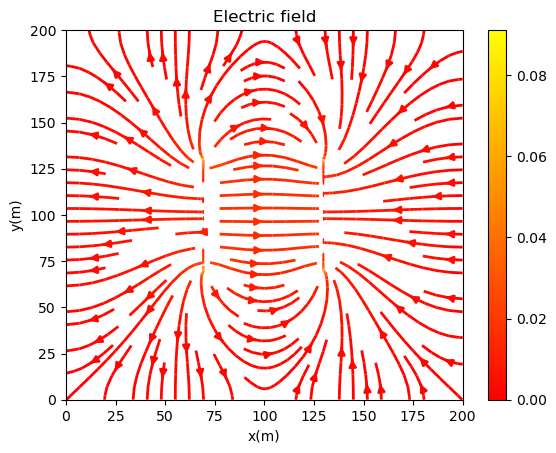

In [5]:
from __future__ import division
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy


# initialize the grid

grid = []
for i in range(201):    
    row_i = []
    for j in range(201):
        if i == 0 or i == 200 or j == 0 or j == 200:
            voltage = 0
        elif 70<=i<=130 and j == 70:
            voltage = 1
        elif 70<=i<=130 and j == 130:
            voltage = -1
        else:
            voltage = 0
        row_i.append(voltage)
    grid.append(row_i)

# define the update_V function (Gauss-Seidel method)

def update_V(grid):

    delta_V = 0

    for i in range(201):    
        for j in range(201):
            if i == 0 or i == 200 or j == 0 or j == 200:
                pass
            elif 70<=i<=130 and j == 70:
                pass
            elif 70<=i<=130 and j == 130:
                pass
            else:
                voltage_new = (grid[i+1][j]+grid[i-1][j]+grid[i][j+1]+grid[i][j-1])/4
                voltage_old = grid[i][j]
                delta_V += abs(voltage_new - voltage_old)
                grid[i][j] = voltage_new

    return grid, delta_V

# define the Laplace_calculate function

def Laplace_calculate(grid):

    epsilon = 10**(-5)*200**2
    grid_init = grid
    delta_V = 0
    N_iter = 0

    while delta_V >= epsilon or N_iter <= 10:
        grid_impr, delta_V = update_V(grid_init)
        grid_new, delta_V = update_V(grid_impr)
        grid_init = grid_new
        N_iter += 1

    return grid_new


x = np.linspace(0,200,201)
y = np.linspace(0,200,201)
X, Y = np.meshgrid(x, y)
Z = Laplace_calculate(grid)
Ex = deepcopy(Z)
Ey = deepcopy(Z)
E = deepcopy(Z)

for i in range(201):
    for j in range(201):
        if i == 0 or i == 200 or j == 0 or j == 200:
            Ex[i][j] = 0
            Ey[i][j] = 0
        else:
            Ex_value = -(Z[i+1][j] - Z[i][j])/2
            Ey_value = -(Z[i][j+1] - Z[i][j])/2
            Ex[i][j] = Ex_value
            Ey[i][j] = Ey_value

for i in range(201):
    for j in range(201):
        E_value = np.sqrt(Ex[i][j]**2 + Ey[i][j]**2)
        E[i][j] = E_value
            
fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, np.array(Ey), np.array(Ex), color=np.array(E), linewidth=2, cmap=plt.cm.autumn)
fig0.colorbar(strm.lines)
ax0.set_xlabel('x(m)')
ax0.set_ylabel('y(m)')
ax0.set_title('Electric field')
plt.show()

### 由图可知，电场线主要从左侧板流向右侧板，板间的电场是均匀的。这与电磁学的结论相符，数值计算方法有效